## Unsupervised Classification with K-means
Lets look back at our spike sorting problem from PS2

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

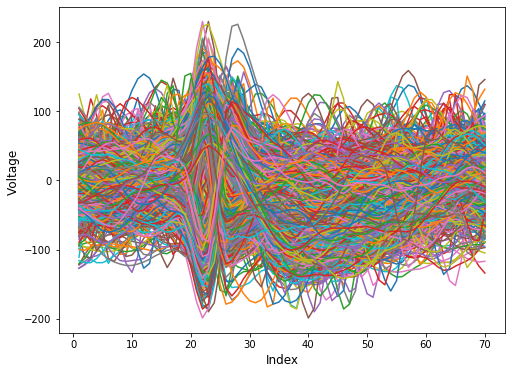

In [17]:
#Load and plot spikes
spkSort = sio.loadmat('SpikeSorting.mat',squeeze_me=True)
voltage = spkSort['voltage']
spikes = spkSort['spikes'] #spike indexes
Lspike = 70 #length of spike
waveforms = np.zeros([3298,70])
for i in np.arange(1,spikes.size):
  waveforms[i,:] = voltage[spikes[i]:spikes[i]+Lspike]
    
plt.figure(figsize=(8,6))
plt.plot(np.arange(1,71),waveforms.T)
plt.xlabel('Index',fontsize=12)
plt.ylabel('Voltage ',fontsize=12)
plt.show()

We can use each time point (all 70 indexes) as features, and use PCA to condense those 70 features into 2 PCs.

In [15]:
pc = PCA(n_components=2)
X_pc = pc.fit_transform(waveforms.T)
var_exp = pc.explained_variance_ratio_.sum() * 100

PC1 = np.matmul(waveforms,X_pc[:,0])
PC2 = np.matmul(waveforms,X_pc[:,1])

X = np.concatenate((PC1[:,np.newaxis],PC2[:,np.newaxis]),axis=1)

print('Our ' + str(X_pc.shape[1]) + ' principal components can explain ' + str(np.round(var_exp*10)/10) + '% of the variance \n')
print('Variance explained by each principal componenet:' + str(pc.explained_variance_ratio_))

Our 2 principal components can explain 71.0% of the variance 

Variance explained by each principal componenet:[0.5244672 0.185876 ]


Lets visualize the spike waveforms in the feature space defined by these 2 PCs

Text(0, 0.5, 'PC2')

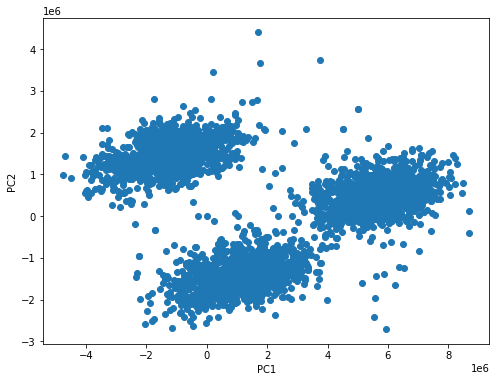

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

Now lets use K-means to seperate our data into clusters

In [53]:
num_clusters = 3
clf = KMeans(n_clusters=num_clusters)
clf.fit(X)



KMeans(n_clusters=3)

Lets visualize what K-means did

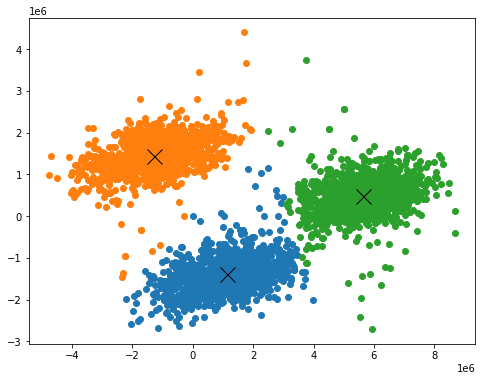

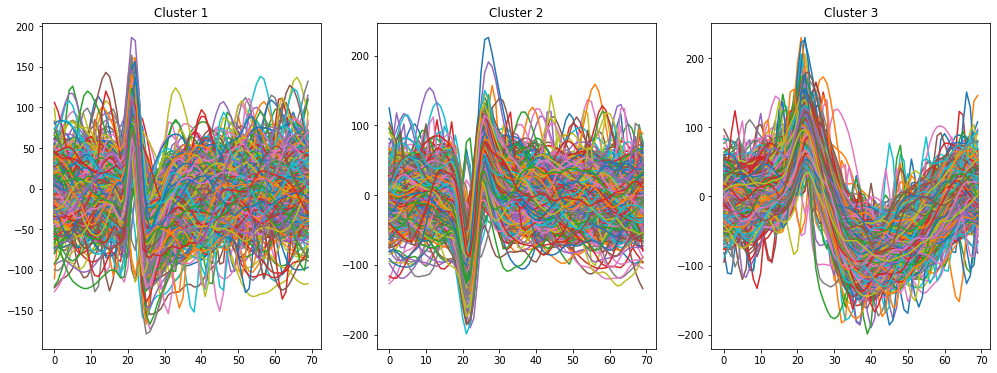

In [56]:
plt.figure(figsize = (8,6))
for c in range(num_clusters):
    clust_mask = clf.labels_ == c
    plt.scatter(X[clust_mask,0],X[clust_mask,1])
    plt.plot(clf.cluster_centers_[c,0], clf.cluster_centers_[c,1],marker='x',color='k',markersize=15)
    
fig,ax = plt.subplots(1,num_clusters,figsize=(17,6))
for c in range(num_clusters):
    ax[c].plot(waveforms[clf.labels_ == c,:].T)
    ax[c].set_title('Cluster ' + str(c+1))
                      
                      
                      

Lets see what the elbow method tells us about how many cluster centers we should choose

Text(0, 0.5, 'Cost')

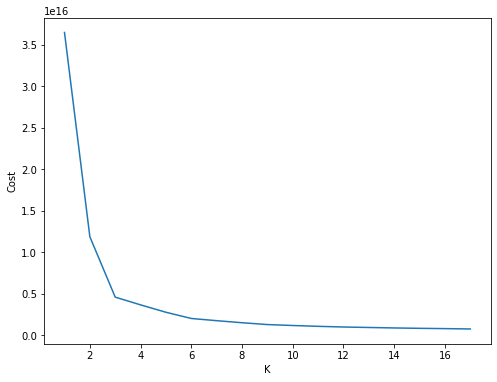

In [57]:
ks = np.arange(1,18)
cost = np.zeros(ks.size)
for nk in range(len(ks)):
    clf = KMeans(n_clusters=ks[nk])
    clf.fit(X)
    cost[nk] = clf.inertia_
    
plt.figure(figsize=(8,6))
plt.plot(ks,cost)
plt.xlabel('K')
plt.ylabel('Cost')